# TASK 4.10 (B)
# Final Task - Part 1

#### Table of Content

1. Importing Libraries
2. Importing Dataframe
3. Checking the Data
4. Modifying Dataframe to Hide PII
5. Creating a Regional Segmentation
6. Creating an Exclusion Flag (+ Exporting DF)
7. Customer Profiling (Age & Income)
8. Importing Departments DF & Merging to Main DF
9. Exporting Dataframe


## 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 2. Importing Dataframe

In [2]:
path = r'/Users/charliegehant/Dropbox/4. Career Foundry/Achievement 4 - Python Fundamentals for Data Analysts/02-2022 Instacart Basket Analysis'

In [4]:
path

'/Users/charliegehant/Dropbox/4. Career Foundry/Achievement 4 - Python Fundamentals for Data Analysts/02-2022 Instacart Basket Analysis'

In [5]:
# Removing the limit on how many columns can be displayed

pd.set_option('display.max_columns', None)

In [6]:
# Removing the limit on how many rows can be displayed

pd.set_option('display.max_rows', None)

> ##### D1: Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.

In [7]:
# Importing dataframe 'orders_products_customers.pkl'

df_OPC = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers.pkl'))

## 3. Checking the Data

In [8]:
df_OPC.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,opp_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spent,spender_flag,median_order_freq,order_freq_flag,first_name,last_name,gender,state,age,date_joined,n_dependants,income,family_status,user_id_merge
0,2539329,1,prior,1,2,8,0.0,196,1,0,both,Soda,77.0,7.0,9.0,both,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,40423,Married,both
1,2539329,1,prior,1,2,8,0.0,14084,2,0,both,Organic Unsweetened Vanilla Almond Milk,91.0,16.0,12.5,both,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,40423,Married,both
2,2539329,1,prior,1,2,8,0.0,12427,3,0,both,Original Beef Jerky,23.0,19.0,4.4,both,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,40423,Married,both
3,2539329,1,prior,1,2,8,0.0,26088,4,0,both,Aged White Cheddar Popcorn,23.0,19.0,4.7,both,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,40423,Married,both
4,2539329,1,prior,1,2,8,0.0,26405,5,0,both,XL Pick-A-Size Paper Towel Rolls,54.0,17.0,1.0,both,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,40423,Married,both


> ##### D2: Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

> I will drop the columns 'first_name' and 'last_name' for security purposes and to hide any traceable PII. I hesitated with dropping only the last names, however considering information about the state, age, family status and number of dependants is also available, I felt even the first names alone could be a security and/or confidentiality breach.  

## 4. Modifying Dataframe to Hide PII

In [9]:
# Dropping the columns 'first_name' and 'last_name' (as well as eval_set as it was supposed to be done earlier)

df_OPC2 = df_OPC.drop(columns = ['first_name', 'last_name', 'eval_set'])

In [10]:
# Checking that the query worked as planned

df_OPC2.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,opp_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spent,spender_flag,median_order_freq,order_freq_flag,gender,state,age,date_joined,n_dependants,income,family_status,user_id_merge
0,2539329,1,1,2,8,0.0,196,1,0,both,Soda,77.0,7.0,9.0,both,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,40423,Married,both
1,2539329,1,1,2,8,0.0,14084,2,0,both,Organic Unsweetened Vanilla Almond Milk,91.0,16.0,12.5,both,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,40423,Married,both
2,2539329,1,1,2,8,0.0,12427,3,0,both,Original Beef Jerky,23.0,19.0,4.4,both,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,40423,Married,both
3,2539329,1,1,2,8,0.0,26088,4,0,both,Aged White Cheddar Popcorn,23.0,19.0,4.7,both,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,40423,Married,both
4,2539329,1,1,2,8,0.0,26405,5,0,both,XL Pick-A-Size Paper Towel Rolls,54.0,17.0,1.0,both,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,40423,Married,both


> ##### Direction 3: The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.
Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).
Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

## 5. Creating a Regional Segmentation

In [11]:
# Distributing 'states' into 'regions' to create a regional segmentation

result = []

for value in df_OPC2["state"]:
  if value == 'Maine' or value == 'New Hampshire' or value == 'Vermont' or value == 'Massachusetts' or value == 'Rhode Island' or value == 'Connecticut' or value == 'New York' or value == 'Pennsylvania' or value == 'New Jersey':
    result.append("Northeast")
  elif value == 'Wisconsin' or value == 'Michigan' or value == 'Illinois' or value == 'Indiana' or value == 'Ohio' or value == 'North Dakota' or value == 'South Dakota' or value == 'Nebraska' or value == 'Kansas' or value == 'Minnesota' or value == 'Iowa' or value == 'Missouri':
    result.append("Midwest")
  elif value == 'Delaware' or value == 'Maryland' or value == 'District of Columbia' or value == 'Virginia' or value == 'West Virginia' or value == 'North Carolina' or value == 'South Carolina' or value == 'Georgia' or value == 'Florida' or value == 'Kentucky' or value == 'Tennessee' or value == 'Mississippi' or value == 'Alabama' or value == 'Oklahoma' or value == 'Texas' or value == 'Arkansas' or value == 'Louisiana':
    result.append("South")
  else:
    result.append("West")

In [12]:
# Pasting the 'result' into a new column 'region'

df_OPC2['region'] = result

In [13]:
# Checking the 4 categories (regions) in the new 'region' column
# As a side note, here I can see the count of values varies greatly between regions (South 2x bigger than Northeast)

df_OPC2['region'].value_counts(dropna = False)

South        10801982
West          8300617
Midwest       7604016
Northeast     5728444
Name: region, dtype: int64

In [14]:
# Checking that all 51 states did get assigned a region
# As a side note, here I can see that the count of values is weirdly equal between states 
# (Could this be because some of the data I am using has been fabricated for the purpose of the exercise?)

df_OPC2[['state','region']].value_counts(dropna = False)

state                 region   
Pennsylvania          Northeast    667738
California            West         660428
Rhode Island          Northeast    657662
Georgia               South        657092
New Mexico            West         655188
Arizona               West         654553
North Carolina        South        652329
Oklahoma              South        652275
Alaska                West         649026
Minnesota             Midwest      648424
Massachusetts         Northeast    647020
Wyoming               West         644927
Virginia              South        642103
Missouri              Midwest      641323
Texas                 South        641051
Colorado              West         639820
Maine                 Northeast    639175
North Dakota          Midwest      638997
Alabama               South        638650
Louisiana             South        638179
Kansas                Midwest      638021
Delaware              South        637477
South Carolina        South        637423
Or

In [15]:
# Checking the name of the column(s) I need for next query

df_OPC2.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', '_merge', 'product_name', 'aisle_id',
       'department_id', 'prices', 'opp_merge', 'price_range_loc',
       'busiest_day', 'busiest_days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'avg_spent', 'spender_flag', 'median_order_freq',
       'order_freq_flag', 'gender', 'state', 'age', 'date_joined',
       'n_dependants', 'income', 'family_status', 'user_id_merge', 'region'],
      dtype='object')

In [16]:
# Creating a crosstab to find out spending habits on a regional level

crosstab = pd.crosstab(df_OPC2['region'], df_OPC2['spender_flag'], dropna = False)

In [17]:
# Importing it into a external Excel file

crosstab.to_clipboard()

In [18]:
df_OPC2['spender_flag'].value_counts(dropna = False)

Low spender     31800381
High spender      634678
Name: spender_flag, dtype: int64

In [19]:
# Having a look at the results on here

crosstab.head()

spender_flag,High spender,Low spender
region,,
Midwest,156084,7447932
Northeast,108276,5620168
South,209878,10592104
West,160440,8140177


> When looking at normalized data (in Excel), I can see that there is not a huge difference in spending habits between the four regions. Midwest (2.05%) has the high percentage of high spenders, followed by the South (1.94%) and West (1.93%), the Northeast (1.89%) has the lowest proportion of high spenders 

> Normalized data = (high spender + low spender = total spender), then (high spender * 100 / total spender = normalized data)

In [20]:
# Creating a DF with the normalized results from Excel

df_spender_percentage = {'region':['Midwest', 'Northeast', 'South', 'West'], 
        'High spender':[2.05, 1.89, 1.94, 1.93]}

In [21]:
# Creating a DF with the normalized results from Excel

df_SP = pd.DataFrame(df_spender_percentage,index=['Midwest', 'Northeast', 'South', 'West'])

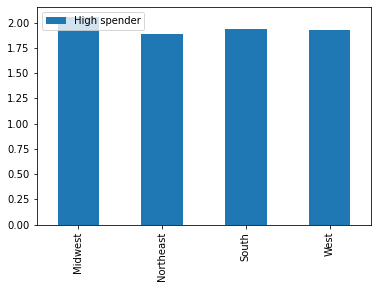

In [22]:
# Creating a bar plot of the high spender percentage by region

bar_highspender_ratio = df_SP.plot.bar()

In [23]:
# Exporting bar plot

bar_highspender_ratio.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_highspender_ratio.png'))

> ##### Direction 4: The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

## 6. Creating an Exclusion Flag (+ Exporting DF)

In [24]:
# Checking how many customers will be excluded from the exclusion flag
# 687303+754267 = 1.441.570

df_OPC2['max_order'].value_counts(dropna = False).sort_index().head()

3    687303
4    754267
5    793845
6    812072
7    804745
Name: max_order, dtype: int64

In [25]:
687303+754267

1441570

In [26]:
# Creating an exclusion flag for low-activity customers

df_OPC2.loc[df_OPC2['max_order'] < 5, 'activity_flag'] = 'Low activity'
df_OPC2.loc[df_OPC2['max_order'] >= 5, 'activity_flag'] = 'Normal activity'

In [27]:
# Checking the result of my query, there are 1.441.570 low-activity customers, as expected!

df_OPC2['activity_flag'].value_counts(dropna = False)

Normal activity    30993489
Low activity        1441570
Name: activity_flag, dtype: int64

In [28]:
# Checking the result of my query

df_OPC2[['max_order','activity_flag']].tail(15)

,max_order,activity_flag
32435044,13,Normal activity
32435045,13,Normal activity
32435046,13,Normal activity
32435047,13,Normal activity
32435048,13,Normal activity
32435049,13,Normal activity
32435050,13,Normal activity
32435051,13,Normal activity
32435052,13,Normal activity
32435053,13,Normal activity


In [29]:
# Excluding low-activity customers from the data

df_OPC3 = df_OPC2.drop(df_OPC2[(df_OPC2['activity_flag'] == 'Low activity')].index)

In [30]:
# Checking the query I just ran (Low activity rows have been deleted)

df_OPC3.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,opp_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spent,spender_flag,median_order_freq,order_freq_flag,gender,state,age,date_joined,n_dependants,income,family_status,user_id_merge,region,activity_flag
0,2539329,1,1,2,8,0.0,196,1,0,both,Soda,77.0,7.0,9.0,both,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,40423,Married,both,South,Normal activity
1,2539329,1,1,2,8,0.0,14084,2,0,both,Organic Unsweetened Vanilla Almond Milk,91.0,16.0,12.5,both,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,40423,Married,both,South,Normal activity
2,2539329,1,1,2,8,0.0,12427,3,0,both,Original Beef Jerky,23.0,19.0,4.4,both,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,40423,Married,both,South,Normal activity
3,2539329,1,1,2,8,0.0,26088,4,0,both,Aged White Cheddar Popcorn,23.0,19.0,4.7,both,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,40423,Married,both,South,Normal activity
4,2539329,1,1,2,8,0.0,26405,5,0,both,XL Pick-A-Size Paper Towel Rolls,54.0,17.0,1.0,both,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,40423,Married,both,South,Normal activity


In [31]:
# Checking the query I just ran (Low activity rows have been deleted)

df_OPC3['activity_flag'].value_counts(dropna = False)

Normal activity    30993489
Name: activity_flag, dtype: int64

In [32]:
# Checking the query I just ran (Low activity rows have been deleted)

df_OPC3[['max_order','activity_flag']].tail(15)

,max_order,activity_flag
32435044,13,Normal activity
32435045,13,Normal activity
32435046,13,Normal activity
32435047,13,Normal activity
32435048,13,Normal activity
32435049,13,Normal activity
32435050,13,Normal activity
32435051,13,Normal activity
32435052,13,Normal activity
32435053,13,Normal activity


In [33]:
# Checking the dataframe

df_OPC3.shape

(30993489, 35)

In [34]:
# Exporting the dataframe for the Instacart CFO

df_OPC3.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'OPC_no_lowactivity_cust.pkl'))

> ##### Direction 5: The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

## 7. Customer Profiling

In [35]:
# Checking the dataframe to determine next steps
# Here I am working with df_OPC2 again, as I deleted 1.440.295 'Low-activity' rows in df_OPC3 for the CFO.  
# Seeing as this direction is not related to the previous one, I feel I should work with the whole dataframe.

df_OPC2.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,opp_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spent,spender_flag,median_order_freq,order_freq_flag,gender,state,age,date_joined,n_dependants,income,family_status,user_id_merge,region,activity_flag
0,2539329,1,1,2,8,0.0,196,1,0,both,Soda,77.0,7.0,9.0,both,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,40423,Married,both,South,Normal activity
1,2539329,1,1,2,8,0.0,14084,2,0,both,Organic Unsweetened Vanilla Almond Milk,91.0,16.0,12.5,both,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,40423,Married,both,South,Normal activity
2,2539329,1,1,2,8,0.0,12427,3,0,both,Original Beef Jerky,23.0,19.0,4.4,both,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,40423,Married,both,South,Normal activity
3,2539329,1,1,2,8,0.0,26088,4,0,both,Aged White Cheddar Popcorn,23.0,19.0,4.7,both,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,40423,Married,both,South,Normal activity
4,2539329,1,1,2,8,0.0,26405,5,0,both,XL Pick-A-Size Paper Towel Rolls,54.0,17.0,1.0,both,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,40423,Married,both,South,Normal activity


### 7a. Age profiling

In [36]:
# Checking the age range which exists within the dataframe (minimum/head and maximum/tail)
# Using this query to see age categories (rather than mix & max)

df_OPC2['age'].value_counts(dropna = False).sort_index().head()

18    500890
19    520207
20    503318
21    513041
22    514388
Name: age, dtype: int64

In [37]:
df_OPC2['age'].value_counts(dropna = False).sort_index().tail()

77    502647
78    495694
79    530305
80    515659
81    509805
Name: age, dtype: int64

In [38]:
# Creating age categories in a new column

df_OPC2.loc[df_OPC2['age'] <= 20, 'age_flag'] = '18-20'
df_OPC2.loc[(df_OPC2['age'] >= 21) & (df_OPC2['age'] <= 29), 'age_flag'] = '21-29'
df_OPC2.loc[(df_OPC2['age'] >= 30) & (df_OPC2['age'] <= 39), 'age_flag'] = '30-39'
df_OPC2.loc[(df_OPC2['age'] >= 40) & (df_OPC2['age'] <= 49), 'age_flag'] = '40-49'
df_OPC2.loc[(df_OPC2['age'] >= 50) & (df_OPC2['age'] <= 59), 'age_flag'] = '50-59'
df_OPC2.loc[(df_OPC2['age'] >= 60) & (df_OPC2['age'] <= 69), 'age_flag'] = '60-69'
df_OPC2.loc[df_OPC2['age'] >= 70, 'age_flag'] = '70+'

In [39]:
# Checking the result of my query

df_OPC2['age_flag'].value_counts(dropna = False).sort_index()

18-20    1524415
21-29    4571870
30-39    5078203
40-49    5114044
50-59    5069148
60-69    4992142
70+      6085237
Name: age_flag, dtype: int64

In [40]:
# Checking the result of my query

df_OPC2[['order_id','age','age_flag']].tail(10)

,order_id,age,age_flag
32435049,626363,74,70+
32435050,2977660,74,70+
32435051,2977660,74,70+
32435052,2977660,74,70+
32435053,2977660,74,70+
32435054,2977660,74,70+
32435055,2977660,74,70+
32435056,2977660,74,70+
32435057,2977660,74,70+
32435058,2977660,74,70+


### 7b. Income profiling

In [41]:
# Checking the income range which exists within the dataframe (minimum and maximum)

df_OPC2['income'].min()

25903

In [42]:
df_OPC2['income'].max()

593901

In [43]:
# Checking summary statistics to decide on my ranges

df_OPC2['income'].describe()

count    3.243506e+07
mean     9.943550e+04
std      4.305540e+04
min      2.590300e+04
25%      6.700200e+04
50%      9.661200e+04
75%      1.279080e+05
max      5.939010e+05
Name: income, dtype: float64

In [44]:
# Creating income categories in a new column

df_OPC2.loc[df_OPC2['income'] <= 49999, 'income_flag'] = 'Low earner'
df_OPC2.loc[(df_OPC2['income'] >= 50000) & (df_OPC2['age'] <= 89999), 'income_flag'] = 'MedLow earner'
df_OPC2.loc[(df_OPC2['income'] >= 90000) & (df_OPC2['income'] <= 129999), 'income_flag'] = 'Medium earner'
df_OPC2.loc[(df_OPC2['income'] >= 130000) & (df_OPC2['income'] <= 299999), 'income_flag'] = 'MedHigh earner'
df_OPC2.loc[df_OPC2['income'] >= 300000, 'income_flag'] = 'High earner'

In [45]:
# Checking the result of my query

df_OPC2['income_flag'].value_counts(dropna = False)

Medium earner     10889428
MedLow earner     10227236
MedHigh earner     7618776
Low earner         3597945
High earner         101674
Name: income_flag, dtype: int64

In [46]:
# Checking the result of my query

df_OPC2[['order_id','income','income_flag']].head(10)

,order_id,income,income_flag
0,2539329,40423,Low earner
1,2539329,40423,Low earner
2,2539329,40423,Low earner
3,2539329,40423,Low earner
4,2539329,40423,Low earner
5,2398795,40423,Low earner
6,2398795,40423,Low earner
7,2398795,40423,Low earner
8,2398795,40423,Low earner
9,2398795,40423,Low earner


## 8. Importing Departments DF & Merging to Main DF

In [47]:
# Importing 'departments.pkl' dataframe

df_dept = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'departments_corrected.pkl'))

In [48]:
# Checking the data

df_dept.head(30)

department_id,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta
10,bulk


In [49]:
# Checking the data, the 'department_id' column is not counted, it must be transformed into a column

df_dept.shape

(21, 1)

In [50]:
# Converting the index column into a column

df_dept['department_id'] = df_dept.index

In [51]:
# Checking the data type

df_dept['department_id'].dtype

dtype('O')

In [52]:
# Checking the data type (it doesn't match so it can't be merged)

df_OPC2['department_id'].dtype

dtype('float64')

In [53]:
# Converting the data type

df_OPC2['department_id'] = df_OPC2['department_id'].astype('str')

In [54]:
# Checking that the query worked

df_OPC2['department_id'].dtype

dtype('O')

In [55]:
# Althought it's now the right format, the data has an added 0 (.0) so it can't be merged as it is!

df_OPC2['department_id'].head()

0     7.0
1    16.0
2    19.0
3    19.0
4    17.0
Name: department_id, dtype: object

In [56]:
# Using .map to map the values of 'department_id' into 'dept_id'

df_OPC2['dept_id'] = df_OPC2['department_id'].map({'1.0':'1','2.0':'2','3.0':'3','4.0':'4','5.0':'5','6.0':'6','7.0':'7','8.0':'8','9.0':'9','10.0':'10','11.0':'11','12.0':'12','13.0':'13','14.0':'14','15.0':'15','16.0':'16','17.0':'17','18.0':'18','19.0':'19','20.0':'20','21.0':'21'})

In [57]:
# Checking the result

df_OPC2['dept_id'].value_counts(dropna = False).sort_index()

1      2234743
10       34573
11      447572
12      708927
13     1875369
14      703033
15     1068058
16     5398747
17      738666
18      423802
19     2887550
2        36291
20     1051249
21       69145
3      1172428
4      9479291
5       153696
6       269253
7      2688123
8        97716
9       866627
NaN      30200
Name: dept_id, dtype: int64

In [58]:
# Converting the data type (again..!) of the new column

df_OPC2['dept_id'] = df_OPC2['dept_id'].astype('str')

In [59]:
# Dropping the column 'department_id'

df_OPC4 = df_OPC2.drop(columns = ['department_id'])

In [60]:
# Checking the dataframe

df_OPC4.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,prices,opp_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spent,spender_flag,median_order_freq,order_freq_flag,gender,state,age,date_joined,n_dependants,income,family_status,user_id_merge,region,activity_flag,age_flag,income_flag,dept_id
0,2539329,1,1,2,8,0.0,196,1,0,both,Soda,77.0,9.0,both,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,40423,Married,both,South,Normal activity,30-39,Low earner,7
1,2539329,1,1,2,8,0.0,14084,2,0,both,Organic Unsweetened Vanilla Almond Milk,91.0,12.5,both,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,40423,Married,both,South,Normal activity,30-39,Low earner,16
2,2539329,1,1,2,8,0.0,12427,3,0,both,Original Beef Jerky,23.0,4.4,both,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,40423,Married,both,South,Normal activity,30-39,Low earner,19
3,2539329,1,1,2,8,0.0,26088,4,0,both,Aged White Cheddar Popcorn,23.0,4.7,both,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,40423,Married,both,South,Normal activity,30-39,Low earner,19
4,2539329,1,1,2,8,0.0,26405,5,0,both,XL Pick-A-Size Paper Towel Rolls,54.0,1.0,both,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,40423,Married,both,South,Normal activity,30-39,Low earner,17


In [62]:
# Renaming the column 'department_id' to 'dept_id' so it can be merged with 'df_OPC4'

df_dept.rename(columns = {'department_id' : 'dept_id'}, inplace = True)

In [63]:
# Checking the dataframe

df_dept.head()

department_id,department,dept_id
1,frozen,1
2,other,2
3,bakery,3
4,produce,4
5,alcohol,5


In [67]:
# Merging the two dataframes

df_OPCD_1 = df_OPC4.merge(df_dept, on = ['dept_id'], indicator = 'd_id_merge', how = 'left')

In [68]:
# Checking the merging was successful

df_OPCD_1['d_id_merge'].value_counts()

both          32404859
left_only        30200
right_only           0
Name: d_id_merge, dtype: int64

In [76]:
# Checking the data

df_OPCD_1[['dept_id', 'department']].value_counts(dropna = False)

dept_id  department     
4        produce            9479291
16       dairy eggs         5398747
19       snacks             2887550
7        beverages          2688123
1        frozen             2234743
13       pantry             1875369
3        bakery             1172428
15       canned goods       1068058
20       deli               1051249
9        dry goods pasta     866627
17       household           738666
12       meat seafood        708927
14       breakfast           703033
11       personal care       447572
18       babies              423802
6        international       269253
5        alcohol             153696
8        pets                 97716
21       missing              69145
2        other                36291
10       bulk                 34573
nan      NaN                  30200
dtype: int64

In [77]:
# Checking the result, all as expected (same count of rows, 2 extra columns: 'department' & 'd_id_merge')

df_OPCD_1.shape

(32435059, 39)

## 9. Exporting Dataframe

> ##### The script is getting quite complex so I am exporting the dataframe and will carry on my analysis in another script. 

In [78]:
# Exporting the dataframe

df_OPCD_1.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_customers_departments.pkl'))